In [1]:
import pandas as pd
import numpy as npt
import seaborn as sns
from matplotlib import pyplot as plt
import statistics as stat
from scipy.stats import shapiro
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.sandbox.stats.runs import runstest_1samp

In [2]:
#INFLASI PENDIDIKAN
df_ip_pendidikan_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Pendidikan.csv', header=[0], index_col=[0])
df_ip_pendidikan_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Pendidikan.csv', header=[0], index_col=[0])
df_ip_pendidikan_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Pendidikan.csv', header=[0], index_col=[0])
df_ip_pendidikan_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Pendidikan.csv', header=[0], index_col=[0])


### Cleaning Data

In [3]:
df_ip_pendidikan = pd.concat([df_ip_pendidikan_2020, df_ip_pendidikan_2021, df_ip_pendidikan_2022, df_ip_pendidikan_2023], axis=1)
df_ip_pendidikan.fillna(0, inplace=True)
df_ip_pendidikan.isna().sum()
df_ip_pendidikan.head(91)


,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,...,01/03/2023,01/04/2023,01/05/2023,01/06/2023,01/07/2023,01/08/2023,01/09/2023,01/10/2023,01/11/2023,01/12/2023
Kota,,,,,,,,,,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,...,0.15,0.4,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,...,0.00,0.0,0.00,0.00,0.00,0.22,0.00,0.00,0.0,0.0
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,...,0.00,0.0,0.00,0.00,0.00,0.52,0.00,0.00,0.0,0.0
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,2.98,0.00,0.00,0.0,0.0
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,5.33,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,...,0.00,0.0,0.00,0.00,0.00,-3.04,0.00,0.00,0.0,0.0
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,...,0.00,0.0,0.00,0.87,1.37,0.81,0.00,0.00,0.0,0.0
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


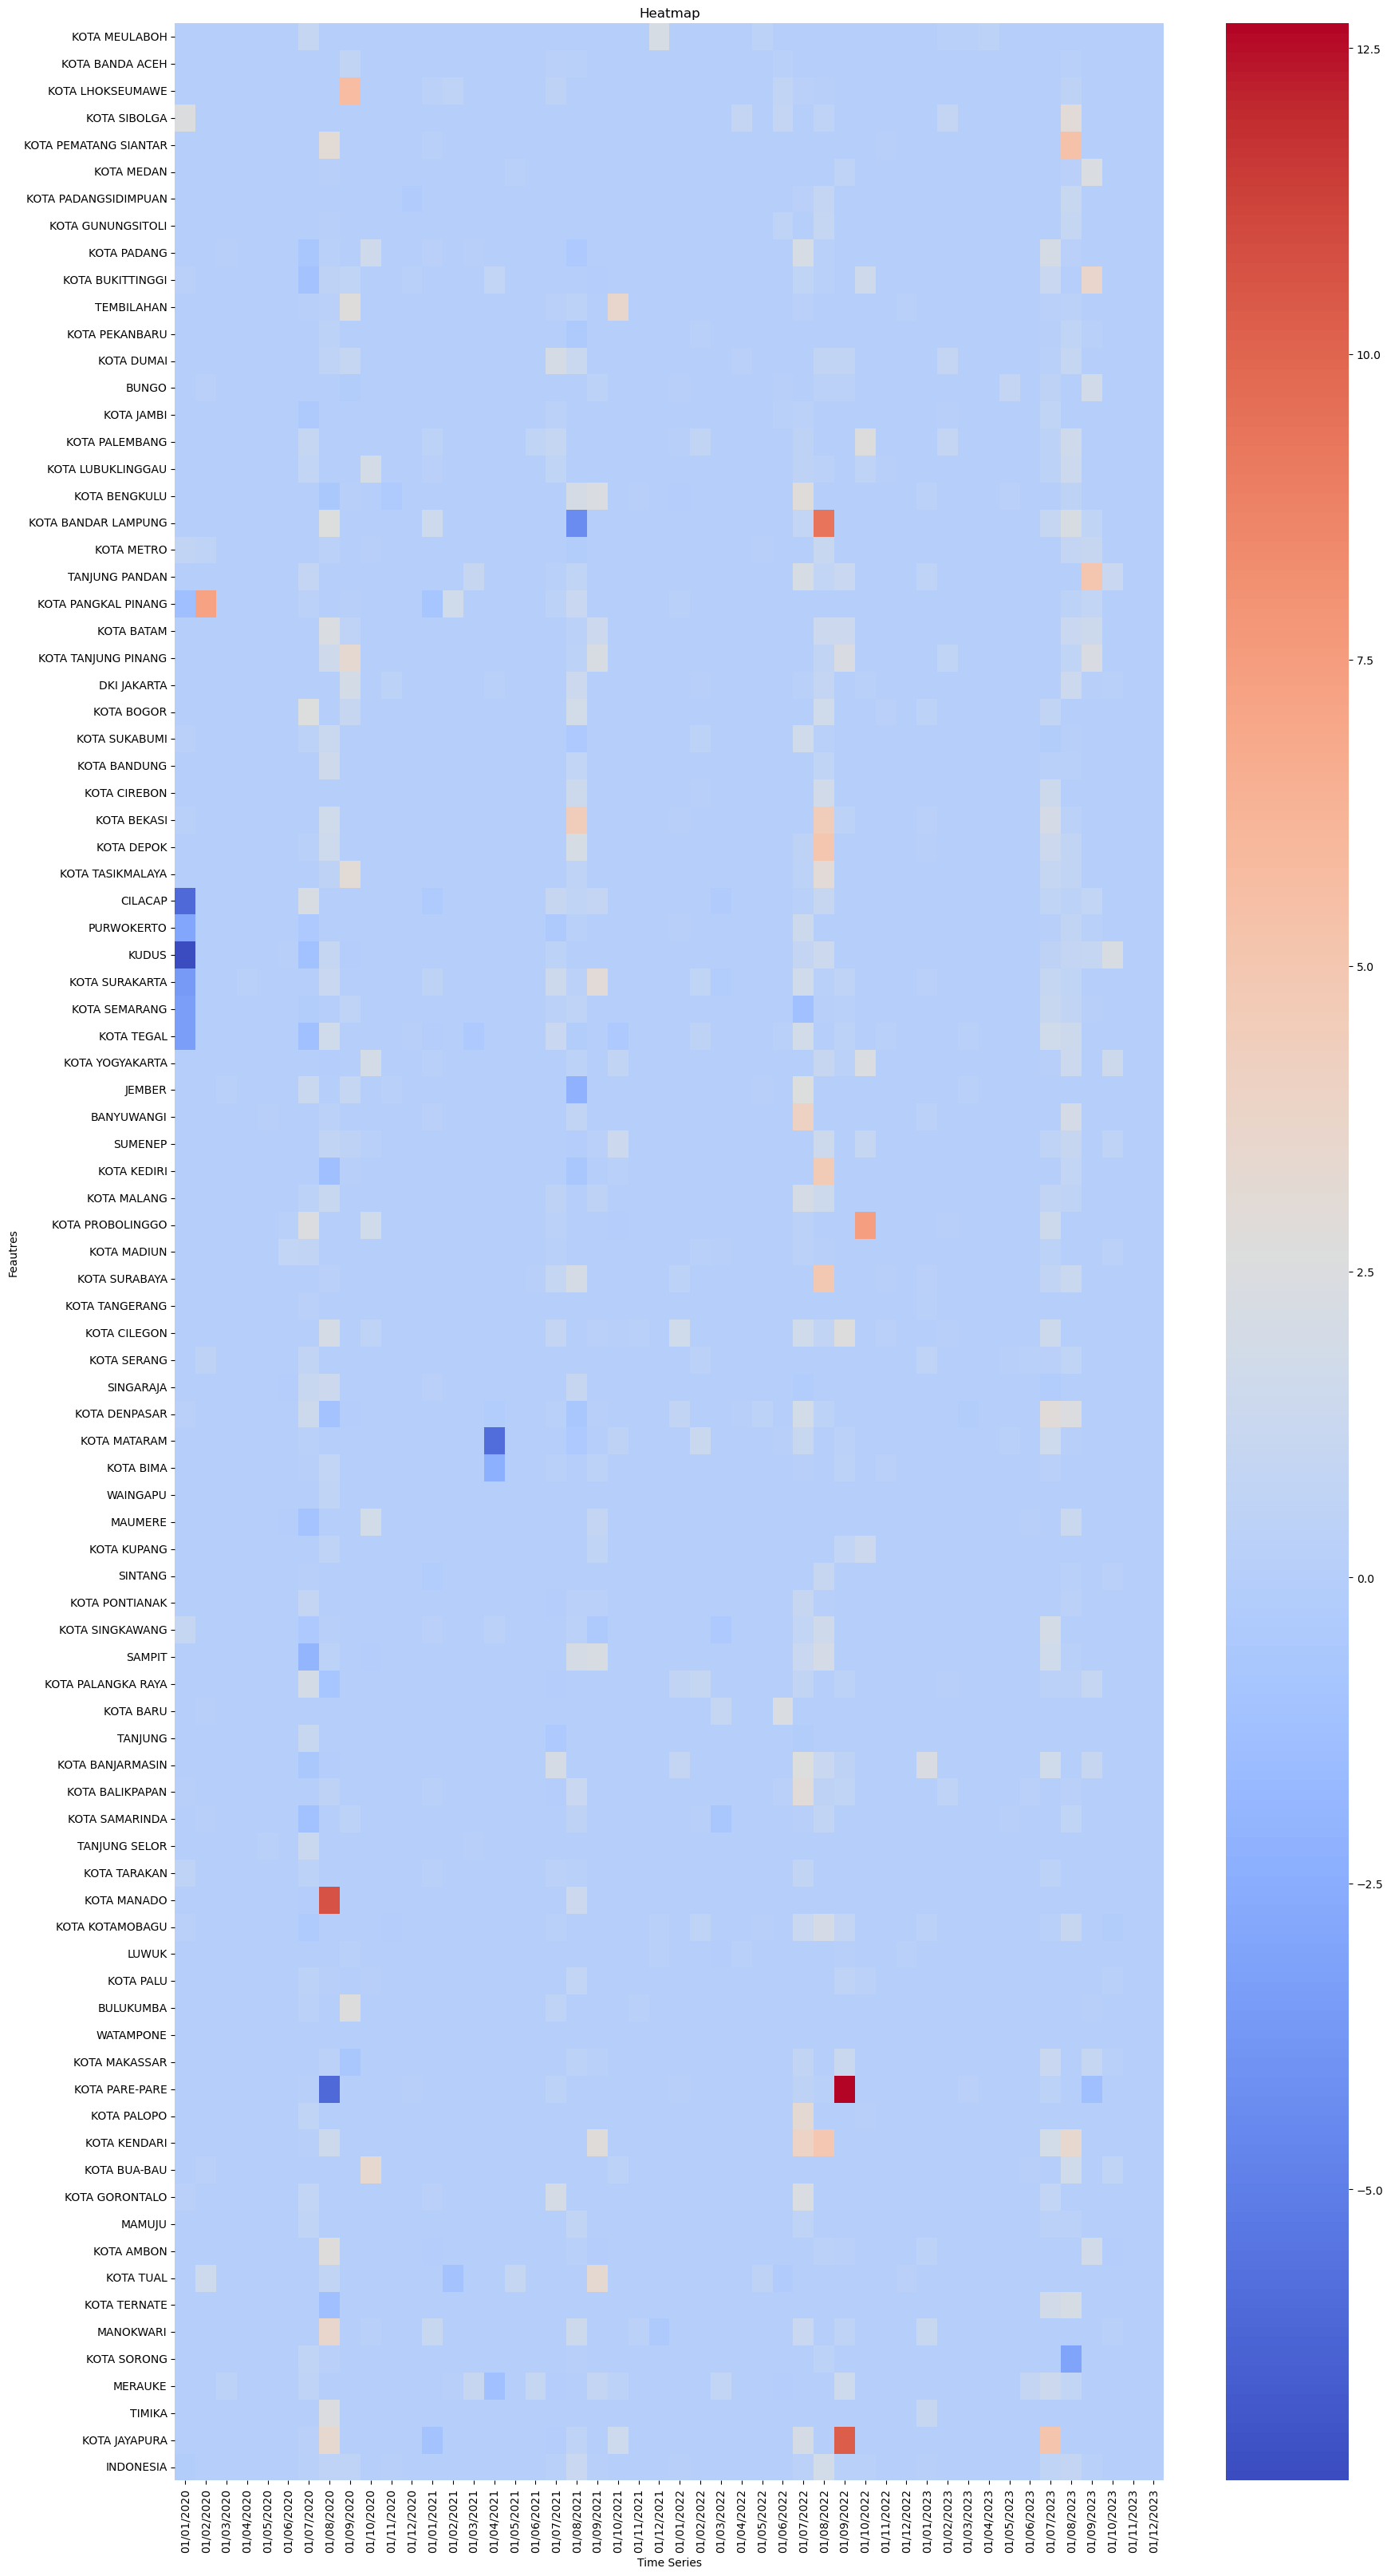

In [4]:
plt.figure(figsize=(20, 40))
sns.heatmap(df_ip_pendidikan, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap')
plt.xlabel('Time Series')
plt.ylabel('Feautres')
plt.show()


In [5]:
df_ip_pendidikan = df_ip_pendidikan.reset_index()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


X = df_ip_pendidikan.drop(columns=["Kota"], axis=1)
Y = df_ip_pendidikan["Kota"]
# print(X)
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(Y)

# Random state sangat mempengaruhi hasil akhir, menggunakan 42 karena default parameter
X_train, X_test, Y_train, Y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [8]:

from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [10]:
Y_pred_r = rfr_model.predict(X_test)
Y_pred_c = rfc_model.predict(X_test)
Y_pred_lr = lr_model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# #Random Forest Regressor
mse = mean_squared_error(Y_test, Y_pred_r)
mae = mean_absolute_error(Y_test, Y_pred_r)
r2 = r2_score(Y_test, Y_pred_r)

# Tampilkan hasil
print("Random Forest Regressor:\n")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R2 Score: {r2}')

Random Forest Regressor:

Mean Squared Error (MSE): 890.6898578947369
Mean Absolute Error (MAE): 25.496315789473684
R2 Score: -0.16312540225145056


In [12]:
#Random Forest Classifier
mse = mean_squared_error(Y_test, Y_pred_c)
mae = mean_absolute_error(Y_test, Y_pred_c)
r2 = r2_score(Y_test, Y_pred_c)

# Tampilkan hasil
print("Random Forest Classifier:\n")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R2 Score: {r2}')

Random Forest Classifier:

Mean Squared Error (MSE): 1172.421052631579
Mean Absolute Error (MAE): 27.68421052631579
R2 Score: -0.5310297926523997


In [13]:
#Linear Regression
mse = mean_squared_error(Y_test, Y_pred_lr)
mae = mean_absolute_error(Y_test, Y_pred_lr)
r2 = r2_score(Y_test, Y_pred_lr)

# Tampilkan hasil
print("Linear Regression:\n")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R2 Score: {r2}')

Linear Regression:

Mean Squared Error (MSE): 74771.65776080386
Mean Absolute Error (MAE): 128.7100885546241
R2 Score: -96.64208465964244
